<a href="https://colab.research.google.com/github/aayu-7/YOLOv3_object_detection/blob/main/YOLOv3_DetectObjectFromImage_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
# Download YOLO files
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -O coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

# Load YOLO
import cv2
import os

# Check if files exist
if not os.path.exists("yolov3.cfg") or not os.path.exists("yolov3.weights"):
    raise FileNotFoundError("YOLO configuration or weights files not found.")

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

print("Classes loaded:", len(classes))


--2024-12-02 04:31:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  25.0MB/s    in 9.6s    

2024-12-02 04:31:19 (24.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-12-02 04:31:19--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [4]:
layer_names = net.getLayerNames()

# Handle output layer indexing for different OpenCV versions
try:
    # For older OpenCV versions
    outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
    # For newer OpenCV versions
    outputlayers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

print("Output layers:", outputlayers)


Output layers: ['yolo_82', 'yolo_94', 'yolo_106']


In [5]:
colors= np.random.uniform(0,255,size=(len(classes),3))

In [6]:
#loading image
img = cv2.imread("/content/istockphoto-1201306396-612x612.jpg")
img = cv2.resize(img,None,fx=0.4,fy=0.3)
height,width,channels = img.shape

In [7]:
#detecting objects
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)

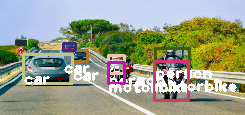

In [8]:
# for b in blob:
#     for n,img_blob in enumerate(b):
#         cv2.imshow(str(n),img_blob)
import cv2
from google.colab.patches import cv2_imshow
net.setInput(blob)
outs = net.forward(outputlayers)
#print(outs[1])


#Showing info on screen/ get confidence score of algorithm in detecting an object in blob
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            #onject detected
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)

            #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
            #rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

            boxes.append([x,y,w,h]) #put all rectangle areas
            confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
            class_ids.append(class_id) #name of the object tha was detected

indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)


font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label,(x,y+30),font,1,(255,255,255),2)

cv2_imshow(img)

#cv2.waitKey(0)
#cv2.destroyAllWindows()